In [1]:
#Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
# import gmaps
import os


In [2]:
# Create dataframe with Pandas
gun_violence_data = pd.read_csv("../gun-violence-data_01-2013_03-2018.csv")

# confirm df creation and check data
len(gun_violence_data)

239677

In [39]:
# create df showing kills and injuries by state
state_casualties = gun_violence_data.groupby(gun_violence_data["state"])

# check number of states
count = state_casualties["state"].nunique()
count


pandas.core.series.Series

In [4]:
# Check states are correct and no errors since there were 51 states
for state in state_casualties:
    print(state[0], end=" | ")


Alabama | Alaska | Arizona | Arkansas | California | Colorado | Connecticut | Delaware | District of Columbia | Florida | Georgia | Hawaii | Idaho | Illinois | Indiana | Iowa | Kansas | Kentucky | Louisiana | Maine | Maryland | Massachusetts | Michigan | Minnesota | Mississippi | Missouri | Montana | Nebraska | Nevada | New Hampshire | New Jersey | New Mexico | New York | North Carolina | North Dakota | Ohio | Oklahoma | Oregon | Pennsylvania | Rhode Island | South Carolina | South Dakota | Tennessee | Texas | Utah | Vermont | Virginia | Washington | West Virginia | Wisconsin | Wyoming | 

In [56]:
## No repeats or errors in data frame. However District of Columbia has been separated out in the data.


# kill totals for plotting purposes
kill_sum = state_casualties["n_killed"].sum()

# injured totals for plotting purposes
injury_sum = state_casualties["n_injured"].sum()

# create data frame of kills and injuries by state for plotting
casualty_sum = pd.DataFrame({"Kill Count":kill_sum,
    "Injury Count":injury_sum})

# combine District of Columbia and Virginia since DC isn't a state
VirginaDC = casualty_sum.loc[['District of Columbia', 'Virginia']].sum()
VirginaDC.name="Virginia and District of Columbia"

# Add New Virginia total to data frame
casualty_sum = casualty_sum.append(VirginaDC)

# drop disctrict of Columbia from and Virginia since from df
casualty_sum.drop(["Virginia", 'District of Columbia',], inplace = True )

# sort the data frame so that its alpabetically correct
casualty_sum = casualty_sum.sort_index(ascending=True)

casualty_sum

,Kill Count,Injury Count
state,,
Alabama,1880,2998
Alaska,267,325
Arizona,1094,1096
Arkansas,773,1347
California,5562,7644
Colorado,796,1133
Connecticut,341,1258
Delaware,217,853
Florida,3909,7072


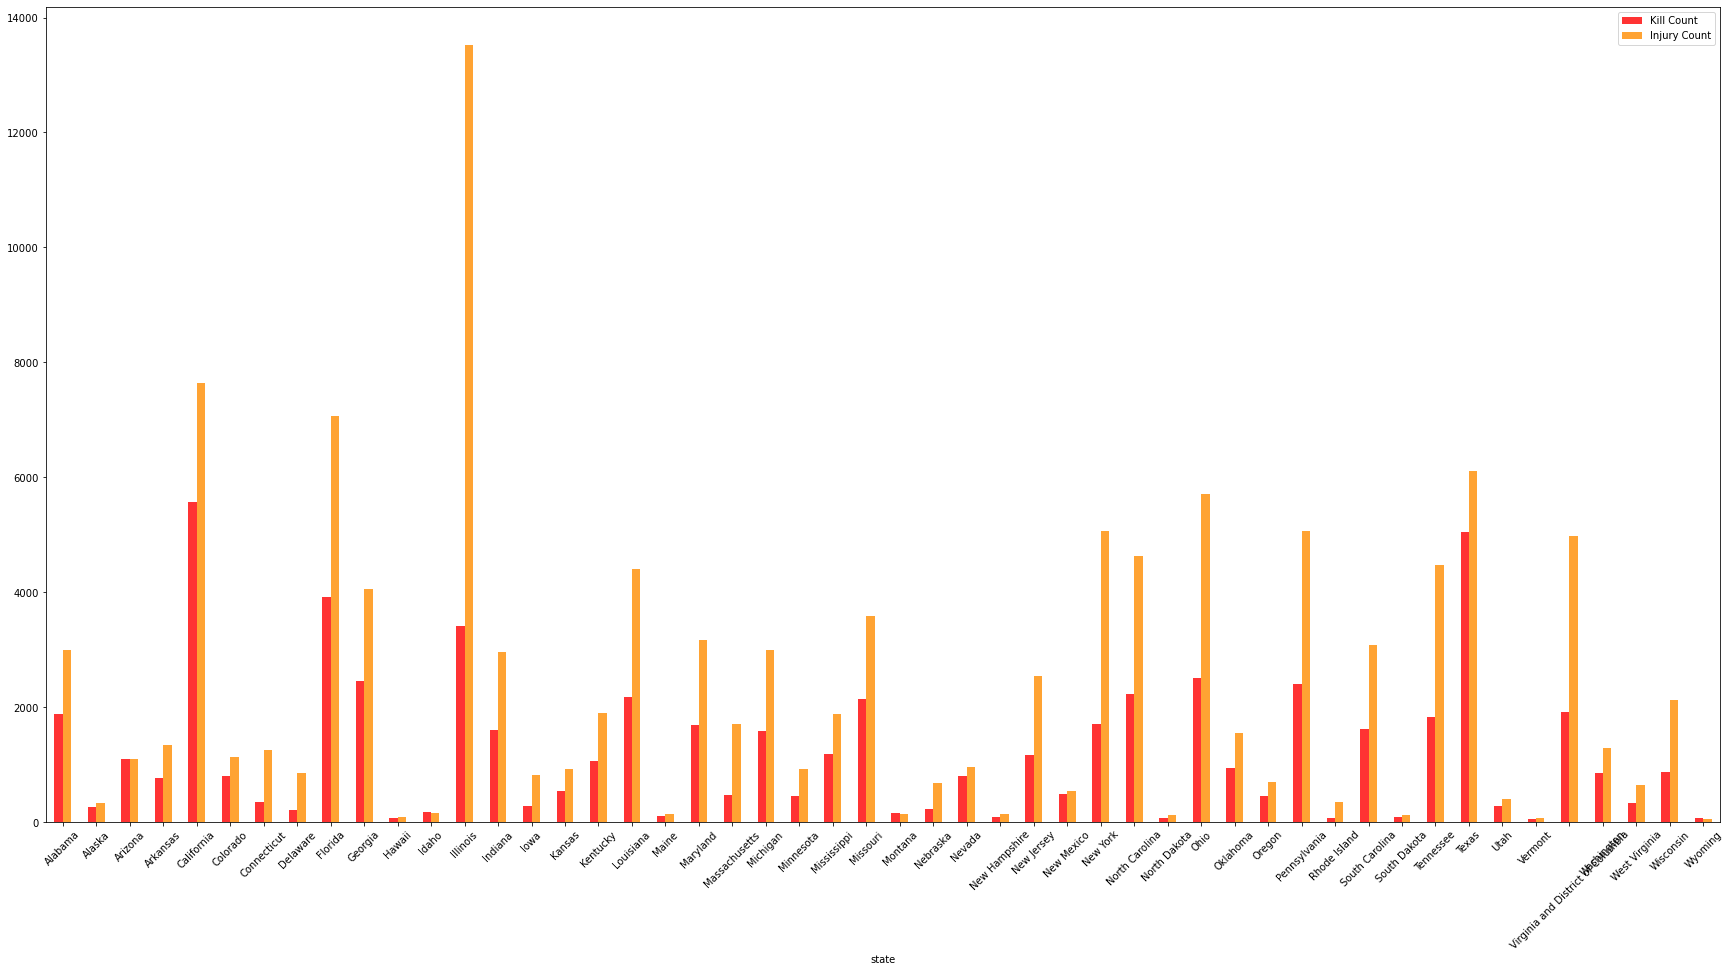

In [58]:
# bar plot of injuries and kills by state

# figure size inside brackets
# from matplotlib.pyplot import figure
# figure(figsize=(10 , 10), dpi=100)
colors= ["red","darkorange"]
casualty_sum.plot(kind="bar",color= colors,alpha=0.8,figsize=(30, 15))
plt.xticks(rotation=45)

plt.show()




In [7]:
# create df showing kills and injuries by City
city_county_df = gun_violence_data.groupby(gun_violence_data["city_or_county"])   
city_county_df
# check number of cities or counties
city_count = city_county_df["city_or_county"].nunique()
city_count

city_or_county
Abbeville                    1
Abbotsford                   1
Abbott                       1
Abbott Township              1
Abbottstown                  1
                            ..
Zumbro Falls                 1
Zumbrota                     1
Zuni (Zuni Pueblo)           1
Zwolle                       1
jefferson parish (county)    1
Name: city_or_county, Length: 12898, dtype: int64

In [8]:


# sum casualties by city
city_sum=city_county_df.sum()

# kill totals for plotting purposes
kill_city = city_sum["n_killed"]

# injured totals for plotting purposes
injury_city = city_sum["n_injured"]

# create data frame of kills and injuries
casualty_city = pd.DataFrame({"Kill Count":kill_city,
    "Injury Count":injury_city})

casualty_city

,Kill Count,Injury Count
city_or_county,,
Abbeville,7,20
Abbotsford,4,2
Abbott,2,0
Abbott Township,0,1
Abbottstown,0,0
...,...,...
Zumbro Falls,0,0
Zumbrota,0,1
Zuni (Zuni Pueblo),0,0


In [25]:
# bins

# sort list
casualty_city = casualty_city.sort_values(["Kill Count", "Injury Count"], ascending = False)

# find top 10 most dangerous cities
kill_city= casualty_city.head(10)



# safe_city=[]
# # find top 10 safest cities with with at least one death
# for city in casualty_city:
#     if casualty_city.loc["Kill Count"]>=1:
#         safe_city.append(city)
#     else:
#         print("value is zero")
safe_city =casualty_city[(casualty_city["Kill Count"]>0)]

# kill_city

len(safe_city)

7144

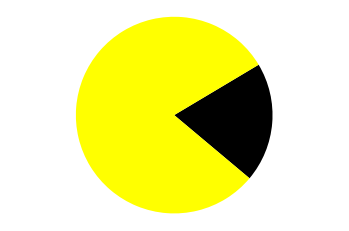

In [ ]:
#Pac-Man Pie chart for Josh 
sizes = [60, 245]
# Plot
plt.pie(sizes, startangle=320, colors= ["black","yellow"])
plt.axis('equal')
plt.show()